# Salmon classification with the bivariate Gaussian

In this assigment, you will predict if a fish is an 'Alaskan' salmon or a 'Canadian' salmon.

The algorithm you will use a generative algorithm.  Where you model each class as a **bivariate Gaussian**. (A Bivariate Gaussian is a Multivariate Gaussian distribution with two features.)

## Step 0. Import statements

The Python programming language, as most programming languages, is augmented by **modules**.  These modules contain functions and classes for specialized tasks needed in machine learning.

Below, we will `import` three modules:
* **pandas**
* **numpy**
* **matplotlib.pyplot**

Note that we imported these modules using **aliases**

In [3]:
# Standard libraries
%matplotlib inline
import pandas as pd
import numpy as np # for better array operations
import matplotlib.pyplot as plt # plotting utilities 

# Module computing the Gaussian density
from scipy.stats import norm, multivariate_normal 


## Step 1. Data preparation: loading, understanding and cleaning the dataset

### Importing the dataset
Make sure the file `Salmon_dataset.csv` is in the same directory as this notebook.

The dataset contains 100  examples, each example has 3 features (*gender, Freshwater, marine*) and a label (*Alaskan, Canadian*).

In [15]:
# Loading the data set using Panda's in a dataframe 

df = pd.read_csv('Salmon_dataset.csv', delimiter=',') 

#Lets check that everything worked before continuing on
df.head()

,Gender,Freshwater,Marine,Origin
0,2,108,368,Alaskan
1,1,131,355,Alaskan
2,1,105,469,Alaskan
3,2,86,506,Alaskan
4,1,99,402,Alaskan


### Data preprocesssing
We will change the labels 'Alaskan' and 'Canadian' to $0$ and $1$ respectively.  In our code it is easier to work with numerical values instead of strings.

Often we will do more dataprepocessing, such as looking for missing values and scaling the data though that is NOT required for this assignment yet. 

In [16]:
# It is easier to work with the data if the labels are integers
# Changing the 'Origin' column values, map 'Alaskan':0 and 'Canadian':1
df['Origin']=df.Origin.map({'Alaskan':0, 'Canadian':1})

#Lets check that everything worked before continuing on
df.head()

,Gender,Freshwater,Marine,Origin
0,2,108,368,0
1,1,131,355,0
2,1,105,469,0
3,2,86,506,0
4,1,99,402,0


In [17]:
# We will store the dataframe as a Numpy array
data = df.to_numpy() 

# Split the examples into a training set (trainx, trainy) and test set (testx, testy) 

########## Splitting the Dataset ##########
n =  data.shape[0] # the number of rows
train_n = int(.9*n) # this test set is a bit small to really evaluate our hypothesis - what could we do to get a better estimate and still keep most of the data to estimate our parameters?
np.random.seed(0) # Our code randomly chooses which examples will be the training data, but for grading purposes we want the random numbers used to seperate the data are the same for everyone
perm = np.random.permutation(n)
trainx = data[perm[0:train_n],1:3] #selecting the two of the features `Freshwater' and 'Marine'
trainy = data[perm[0:train_n],3]
testx = data[perm[train_n:n], 1:3] # We won't look at the testx data until it is time to evauate our hypothesis.  This numpy array contains the set of test data for the assignment
testy = data[perm[train_n:n],3]

##########


### Plotting the dataset
Visualization can be helpful when exploring and getting to know a dataset.

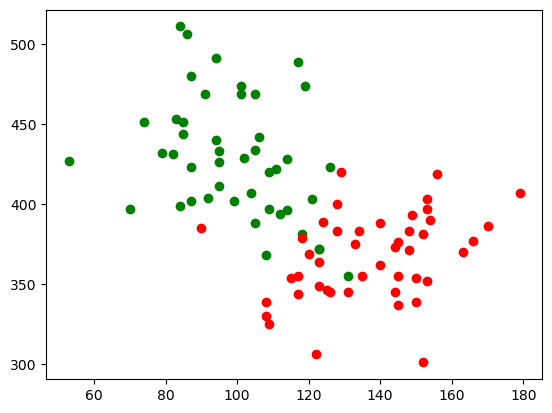

In [18]:
# plotting the Alaskan salmon as a green dot
plt.plot(trainx[trainy==0,0], trainx[trainy==0,1], marker='o', ls='None', c='g')
# plotting the Canadian salmon as a red dot
plt.plot(trainx[trainy==1,0], trainx[trainy==1,1], marker='o', ls='None', c='r')

## Step 2. Model training: implementing Gaussian Discriminant Analysis

In our first lecture, we discussed an algorithm which is actually a specific variant of Gaussian Discriminant Analysis (GDA).  In our next lecture will cover the broader, general case of GDA.


### Sufficient Statistics
To implement this specific GDA variant from scratch, we'll first determine the Gaussian's sufficient statistics. 

For a multivariate Gaussian distribution, the sufficient statistics are the mean vector and the covariance matrix.

`fit_gaussian` function: This function will compute the mean and covariance of a Gaussian distribution for a given set of examples. In machine learning terminology, "fitting" is about tailoring a model to best depict the data. For our purpose, "fitting the Gaussian" translates to finding the best mean and covariance matrix for the given dataset.

Please refer to the lecture notes for the formulas needed to compute the mean and covariance.

In [19]:
# Input: a design matrix
# Output: a numpy array containing the means for each feature, and a 2-dimensional numpy array containng the covariance matrix sigma
def fit_gaussian(x):
 
 
########## TO DO ##########

    # Compute the mean
    
    # find the covariance:
    
    # get the covariance matrix sigma




 mu=np.mean(x,axis=0)
 l=0
 for c in x.T:
     if(l==0):
         l=l+1
         a=c
     else:
        b=c;    
 	
 
 
 sigma=np.cov(a,b,bias=True)
    
##########
 return mu,sigma




### Write the rest of your code here

In [24]:


d=0
alaskan=[]
canadian=[]
for i in trainx:
    if(trainy[d]==0):
        alaskan.append(i)
        
        

        d=d+1

    else:
        canadian.append(i)
        

        d=d+1


ala=np.array(alaskan)
cana=np.array(canadian)
mean_alask,co_alask = fit_gaussian(ala)
mean_canad,co_canad=fit_gaussian(cana)


print('The mean parameter of the alaskan salmon is found to be')
print(mean_alask)

print('The mean parameter of the canadian salmon is found to be')
print(mean_canad)

print('The covariance matrix of the alaskan salmon is found to be')
print(co_alask)

print('The covariance matrix of the canadian salmon is found to be')
print(co_canad)



predictions=[]

for i in testx:
    a=multivariate_normal.pdf(i,mean_alask,co_alask)
    b=multivariate_normal.pdf(i,mean_canad,co_canad)

    if(a>b):
        predictions.append(0)
    else:
        predictions.append(1)    
    







The mean parameter of the alaskan salmon is found to be
[ 99.22222222 428.64444444]
The mean parameter of the canadian salmon is found to be
[136.93333333 366.64444444]
The covariance matrix of the alaskan salmon is found to be
[[ 264.35061728 -212.54320988]
 [-212.54320988 1386.2291358 ]]
The covariance matrix of the canadian salmon is found to be
[[338.24       162.82074074]
 [162.82074074 712.85135802]]


### On your own

Evaluate the classifier's performance in predicting the examples stored in `testx`.

In [36]:
c=0
print('The predictions found are the following')
i=0
for l in testx:
    if(predictions[i]==0):

        print(l,"     ","Alaskan")
        i=i+1;
    else:
        print(l,"     ","Canadian")
        i=i+1


for i in range(len(testy)):
    if(testy[i]==predictions[i]):
        c=c+1
    else:
        c=c+0





print('The accuracy is :',c/len(testy))

The predictions found are the following
[144 403]       Canadian
[ 76 442]       Alaskan
[100 470]       Alaskan
[155 349]       Canadian
[ 99 403]       Alaskan
[124 341]       Canadian
[136 438]       Alaskan
[152 301]       Canadian
[ 99 481]       Alaskan
[ 80 398]       Alaskan
The accuracy is : 0.9
